# Test: Carga de $CH_4$

Tank created. Tank flow rate: 2e-05 kg/s


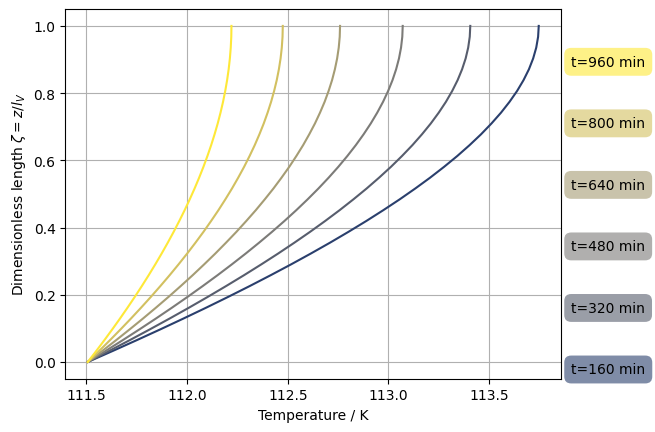

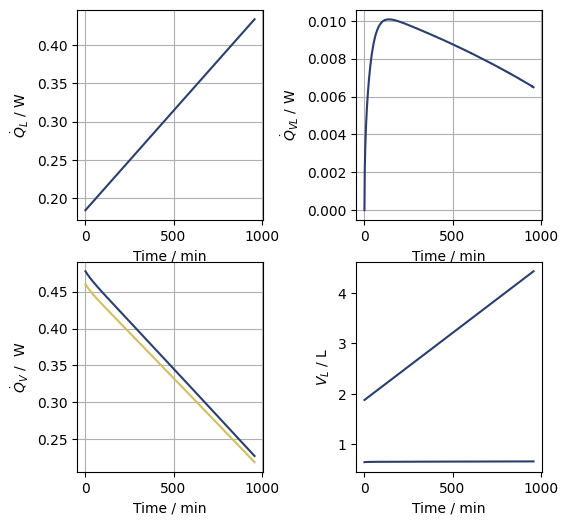

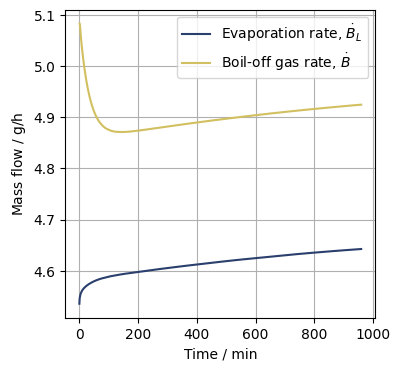

In [3]:
# Step 1: Third-party module imports
import numpy as np # Scientific computing
import matplotlib.pyplot as plt # Visualisation
# CryoEvap module imports
from cryoevap.storage_tanks import Tank
from cryoevap.cryogens import Cryogen

# Step 2: Initialise tank object
Q_roof = 0 		# Roof heat ingress / W
d_i = 0.201 		# Internal diameter / m
d_o = 0.204   		# External diameter / m
T_air = 298.15 		# Temperature of the environment K
U_L = 0.026 		# Liquid overall heat transfer coefficient W/m^2/K
U_V = 0.026 		# Vapour overall heat transfer coefficient W/m^2/K
Q_b = 0 		# Heat transfer rate at the bottom / W
V_tank = 6.75e-3 	# Tank volume / m^3
LF = 0.278  		# Initial liquid filling / -
P = 100000 		# Tank operating pressure / Pa
m_L = 2e-5 		# Initial mass flow-rate of liquid / kg
small_tank = Tank(d_i, d_o, V_tank, LF, m_L) # Initialize large-scale tank
small_tank.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b, eta_w = 0.963)

print(f"Tank created. Tank flow rate: {small_tank.m_L} kg/s")

# Step 3: Initialise cryogen
methane = Cryogen(name = "methane") # Initialize cryogen object
methane.set_coolprops(P)
small_tank.cryogen = methane	# Set initialised cryogen as a tank property

# Step 4: Simulation setup
dz = 0.005 # grid spacing / m
n_z = 1 + int(np.round(small_tank.l_V/dz, 0)) # Number of nodes
small_tank.z_grid = np.linspace(0, 1, n_z) # Set dimensionless grid
small_tank.U_roof = 0 # Roof overall heat transfer coefficient W/m^2/K
evap_time = 3600*16 # Define evaporation time / s
small_tank.time_interval = 60 # Time-step to record data
small_tank.plot_interval = evap_time/6 # Interval to plot vapour temperature profiles
small_tank.evaporate(evap_time) # Simulate the evaporation

# Step 5: Visualisation
small_tank.plot_tv(t_unit="min") # Vapour temperature
small_tank.plot_Q( unit="W", t_unit="min") # Heat transfer rates
small_tank.plot_V_L(unit="L", t_unit="min") # Liquid volume
small_tank.plot_BOG(unit='g/h', t_unit="min") # Boil-off gas and evaporation rates

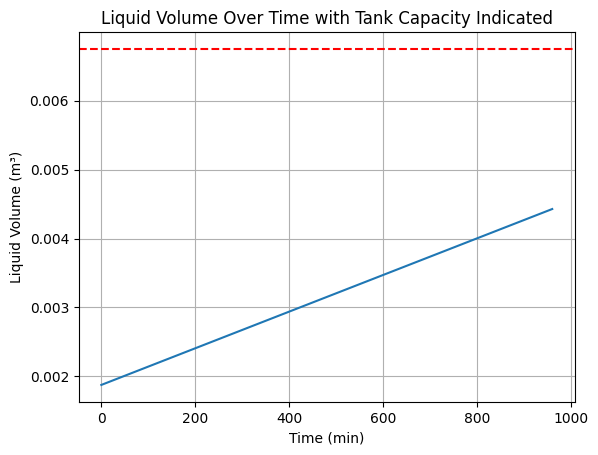

In [4]:
boil_off_rate = small_tank.data['V_L']
times = small_tank.data['Time'] / 60
# Plot the boil-off rate at the start and end of the evaporation
import matplotlib.pyplot as plt

plt.plot(times, boil_off_rate)
# Plot an horizontal line at y = V_tank
plt.axhline(y=V_tank, color='r', linestyle='--')
plt.xlabel('Time (min)')
plt.ylabel('Liquid Volume (m³)')
plt.title('Liquid Volume Over Time with Tank Capacity Indicated')
plt.grid()
plt.show()